torch.Size([64, 3, 32, 32])


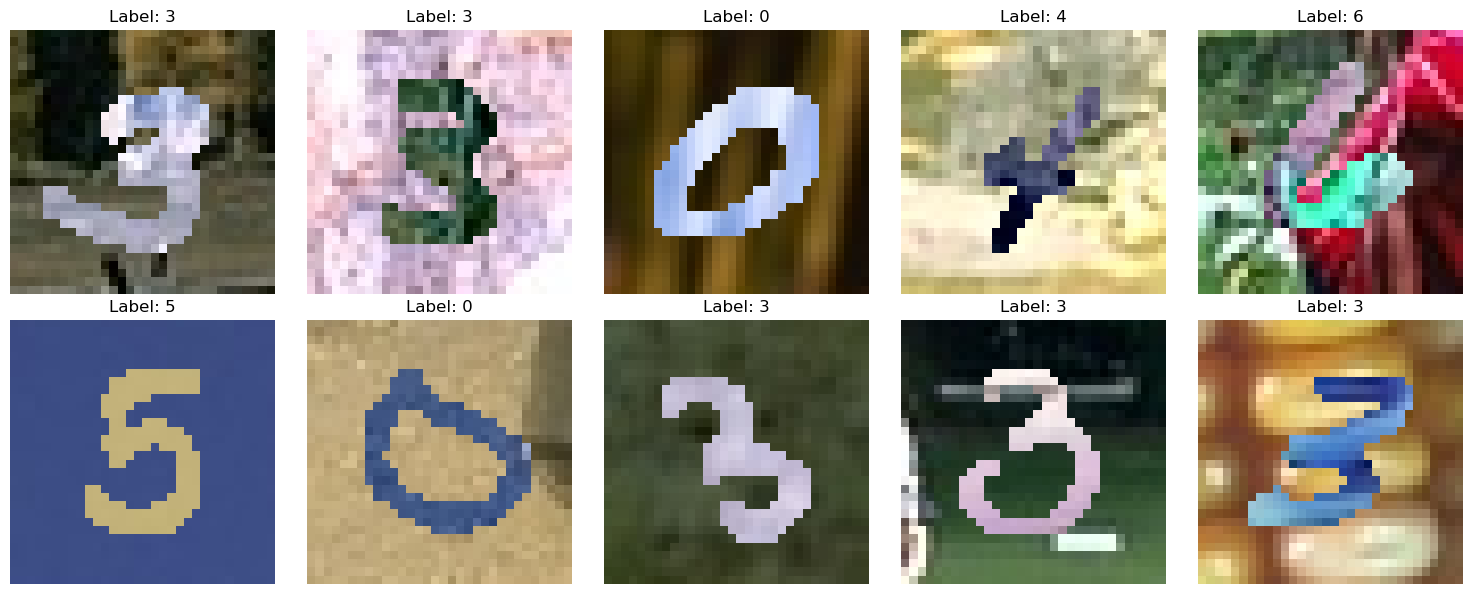

훈련 데이터셋 크기: 59000
테스트 데이터셋 크기: 9000
훈련 데이터셋 클래스별 크기: [6158, 6639, 5746, 5853, 5825, 5851, 6028, 5757, 5331, 5812]
테스트 데이터셋 클래스별 크기: [914, 1015, 890, 933, 878, 919, 908, 880, 807, 856]


In [2]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 데이터 변환 정의
transform = transforms.Compose([
    transforms.ToTensor(),  # 이미지 데이터를 텐서로 변환
    # transforms.Normalize((0.5,), (0.5,))  # 이미지 정규화
])

# MNIST-M 데이터셋 경로 설정
train_dir = '/data2/MNIST-M/training'  # 훈련 데이터가 저장된 경로
test_dir = '/data2/MNIST-M/testing'    # 테스트 데이터가 저장된 경로

# ImageFolder를 사용하여 데이터셋 불러오기
train_dataset = datasets.ImageFolder(
    root=train_dir,  # 훈련 데이터 디렉토리
    transform=transform
)

test_dataset = datasets.ImageFolder(
    root=test_dir,   # 테스트 데이터 디렉토리
    transform=transform
)

# 데이터 로더 생성
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 데이터 로더 사용 예시
for images, labels in train_loader:
    print(images.shape)  # 텐서 형태 출력
    break  # 한 배치만 출력 후 종료

# 데이터 로더에서 한 배치 가져오기
images, labels = next(iter(train_loader))

# 10개 이미지 시각화
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i in range(10):
    ax = axes[i // 5, i % 5]  # 2x5 그리드로 이미지를 배치
    ax.imshow(images[i].permute(1, 2, 0))  # 이미지를 (C, H, W)에서 (H, W, C)로 변환
    ax.set_title(f"Label: {labels[i]}")
    ax.axis('off')  # 축 숨기기

plt.tight_layout()
plt.show()

# 데이터셋 크기 확인
train_size = len(train_dataset)
test_size = len(test_dataset)

print(f"훈련 데이터셋 크기: {train_size}")
print(f"테스트 데이터셋 크기: {test_size}")



# 클래스별 크기 확인
train_class_sizes = [len(os.listdir(os.path.join(train_dir, class_name))) for class_name in os.listdir(train_dir)]
test_class_sizes = [len(os.listdir(os.path.join(test_dir, class_name))) for class_name in os.listdir(test_dir)]


print(f"훈련 데이터셋 클래스별 크기: {train_class_sizes}")
print(f"테스트 데이터셋 클래스별 크기: {test_class_sizes}")

Train 클래스별 개수:
tensor([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

Test 클래스별 개수:
tensor([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009])


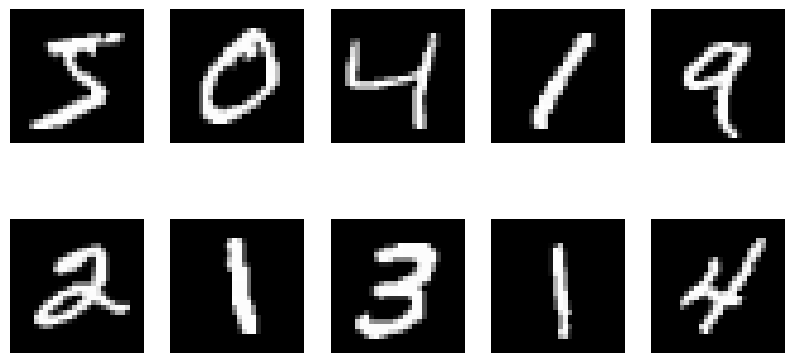

In [1]:
import torchvision
import matplotlib.pyplot as plt

# MNIST 데이터셋 불러오기
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(root='/data2', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='/data2', train=False, download=True, transform=transform)

# 각 클래스별 개수 (train 데이터)
train_class_counts = train_dataset.targets.bincount()

# 각 클래스별 개수 (test 데이터)
test_class_counts = test_dataset.targets.bincount()

# 데이터셋별 개수 출력
print("Train 클래스별 개수:")
print(train_class_counts)
print("\nTest 클래스별 개수:")
print(test_class_counts)

# 데이터의 첫 10장 가져오기 (train 데이터셋에서)
train_images = train_dataset.data[:10]
train_labels = train_dataset.targets[:10]

# 이미지 출력
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i], cmap='gray')
    ax.axis('off')
plt.show()
